In [4]:
import pandas as pd
import numpy as np
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [8]:
data=pd.read_csv("train_v9rqX0R (1).csv ")

In [11]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [12]:
data.shape

(8523, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [16]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
cat_col=[]                  # finding the categorical column
for x in data.dtypes.index:
    if data.dtypes[x]=="object":
        cat_col.append(x)

In [18]:
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [19]:
data=data.drop("Item_Identifier",axis=1)      # dropping the column

In [20]:
data=data.drop("Outlet_Identifier",axis=1)    # dropping the column

In [21]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Data Preprocessing

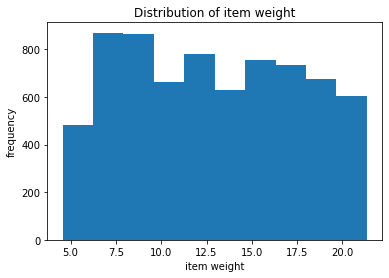

In [22]:
plt.hist(data["Item_Weight"])
plt.title('Distribution of item weight')
plt.xlabel("item weight")
plt.ylabel("frequency")
plt.show()

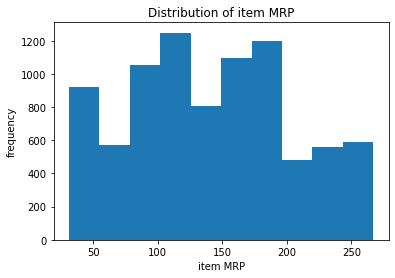

In [23]:
plt.hist(data["Item_MRP"])
plt.title('Distribution of item MRP')
plt.xlabel("item MRP")
plt.ylabel("frequency")
plt.show()

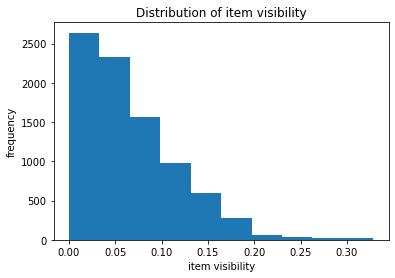

In [24]:
plt.hist(data["Item_Visibility"])
plt.title('Distribution of item visibility')
plt.xlabel("item visibility")
plt.ylabel("frequency")
plt.show()

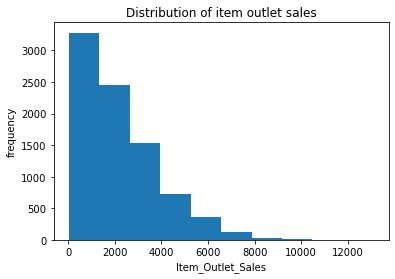

In [25]:
plt.hist(data["Item_Outlet_Sales"])

plt.title('Distribution of item outlet sales')
plt.xlabel("Item_Outlet_Sales")

plt.ylabel("frequency")
plt.show()

In [26]:
data.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [27]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [28]:
data.isna().sum()       # checking the missing values

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
num_col=data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]


In [30]:
num_col

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,1999
1,5.920,0.019278,48.2692,2009
2,17.500,0.016760,141.6180,1999
3,19.200,0.000000,182.0950,1998
4,8.930,0.000000,53.8614,1987
...,...,...,...,...
8518,6.865,0.056783,214.5218,1987
8519,8.380,0.046982,108.1570,2002
8520,10.600,0.035186,85.1224,2004
8521,7.210,0.145221,103.1332,2009


In [31]:
data["Item_Weight"].isna().sum()

1463

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
sr=SimpleImputer(missing_values=np.nan,strategy="mean")
sr=sr.fit(num_col)
num_col=sr.transform(num_col)

In [34]:
type(num_col)

numpy.ndarray

In [35]:
num_col=pd.DataFrame(num_col,columns=[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])

In [36]:
num_col.isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

In [37]:
data.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [38]:
data.drop(['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'] ,axis=1,inplace=True)

In [39]:
data

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store,732.3800
4,Low Fat,Household,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1,2778.3834
8519,Regular,Baking Goods,NaN,Tier 2,Supermarket Type1,549.2850
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1,1193.1136
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2,1845.5976


In [40]:
data=pd.concat([num_col,data],axis=1)

In [41]:
data

,"(Item_Weight,)","(Item_Visibility,)","(Item_MRP,)","(Outlet_Establishment_Year,)",Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999.0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,0.019278,48.2692,2009.0,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,0.016760,141.6180,1999.0,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,0.000000,182.0950,1998.0,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store,732.3800
4,8.930,0.000000,53.8614,1987.0,Low Fat,Household,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,0.046982,108.1570,2002.0,Regular,Baking Goods,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,0.035186,85.1224,2004.0,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,0.145221,103.1332,2009.0,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2,1845.5976


In [42]:
data.isna().sum()

(Item_Weight,)                     0
(Item_Visibility,)                 0
(Item_MRP,)                        0
(Outlet_Establishment_Year,)       0
Item_Fat_Content                   0
Item_Type                          0
Outlet_Size                     2410
Outlet_Location_Type               0
Outlet_Type                        0
Item_Outlet_Sales                  0
dtype: int64

In [43]:
data["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [44]:
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"]).mode()[0]

In [45]:
data.isna().sum()

(Item_Weight,)                  0
(Item_Visibility,)              0
(Item_MRP,)                     0
(Outlet_Establishment_Year,)    0
Item_Fat_Content                0
Item_Type                       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [46]:
data

,"(Item_Weight,)","(Item_Visibility,)","(Item_MRP,)","(Outlet_Establishment_Year,)",Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999.0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,0.019278,48.2692,2009.0,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,0.016760,141.6180,1999.0,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,0.000000,182.0950,1998.0,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store,732.3800
4,8.930,0.000000,53.8614,1987.0,Low Fat,Household,Medium,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,Low Fat,Snack Foods,Medium,Tier 3,Supermarket Type1,2778.3834
8519,8.380,0.046982,108.1570,2002.0,Regular,Baking Goods,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,0.035186,85.1224,2004.0,Low Fat,Health and Hygiene,Medium,Tier 2,Supermarket Type1,1193.1136
8521,7.210,0.145221,103.1332,2009.0,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2,1845.5976


In [47]:
data.shape

(8523, 10)

In [48]:
data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [49]:
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [50]:
data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [51]:
data["Outlet_Years"]=2013-data[('Outlet_Establishment_Year',)]

In [52]:
data["Outlet_Years"].astype(int)

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int32

In [53]:
data

,"(Item_Weight,)","(Item_Visibility,)","(Item_MRP,)","(Outlet_Establishment_Year,)",Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.300,0.016047,249.8092,1999.0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,3735.1380,14.0
1,5.920,0.019278,48.2692,2009.0,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,443.4228,4.0
2,17.500,0.016760,141.6180,1999.0,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,2097.2700,14.0
3,19.200,0.000000,182.0950,1998.0,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store,732.3800,15.0
4,8.930,0.000000,53.8614,1987.0,Low Fat,Household,Medium,Tier 3,Supermarket Type1,994.7052,26.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,Low Fat,Snack Foods,Medium,Tier 3,Supermarket Type1,2778.3834,26.0
8519,8.380,0.046982,108.1570,2002.0,Regular,Baking Goods,Medium,Tier 2,Supermarket Type1,549.2850,11.0
8520,10.600,0.035186,85.1224,2004.0,Low Fat,Health and Hygiene,Medium,Tier 2,Supermarket Type1,1193.1136,9.0
8521,7.210,0.145221,103.1332,2009.0,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2,1845.5976,4.0


# Exploratory Data Analysis

C:\Users\libin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="('Item_Weight',)", ylabel='Density'>

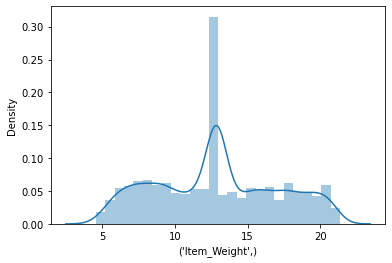

In [54]:
sns.distplot(data[('Item_Weight',)])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="('Item_MRP',)", ylabel='Density'>

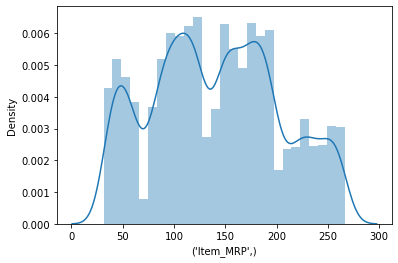

In [55]:
sns.distplot(data[('Item_MRP',)])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

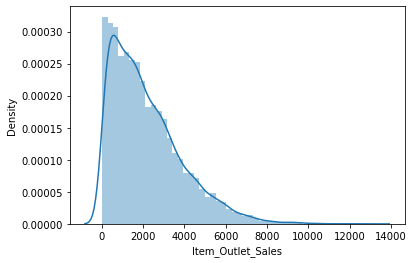

In [56]:
sns.distplot(data['Item_Outlet_Sales'])

In [57]:
data['Item_Outlet_Sales']=np.log(1+data['Item_Outlet_Sales'])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

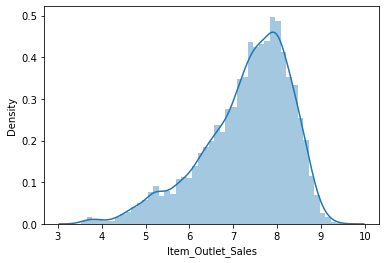

In [58]:
sns.distplot(data['Item_Outlet_Sales'])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="('Item_Visibility',)", ylabel='Density'>

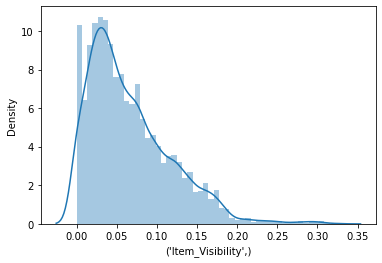

In [59]:
sns.distplot(data[('Item_Visibility',)])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

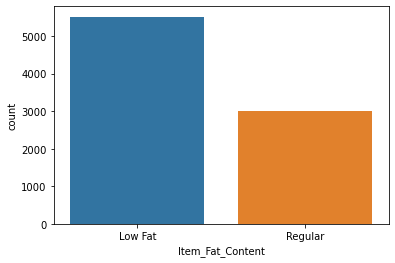

In [60]:
sns.countplot(data["Item_Fat_Content"])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

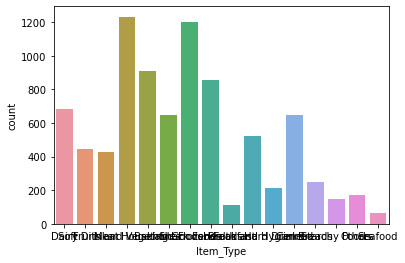

In [61]:
sns.countplot(data['Item_Type'])
#chart.set_xtickslabels(rotation=90)

C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel="('Outlet_Establishment_Year',)", ylabel='count'>

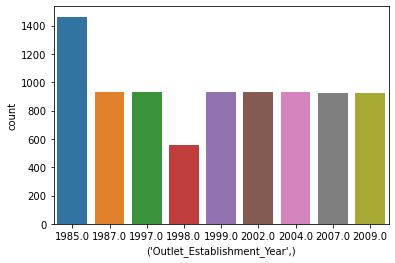

In [62]:
sns.countplot(data[('Outlet_Establishment_Year',)])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

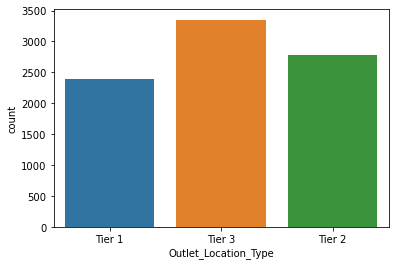

In [63]:
sns.countplot(data['Outlet_Location_Type'])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

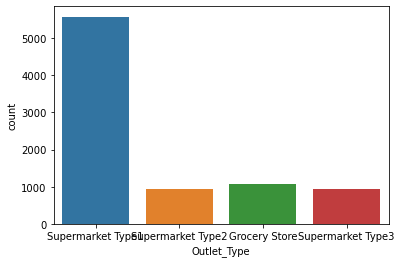

In [64]:
sns.countplot(data['Outlet_Type'])

<AxesSubplot:>

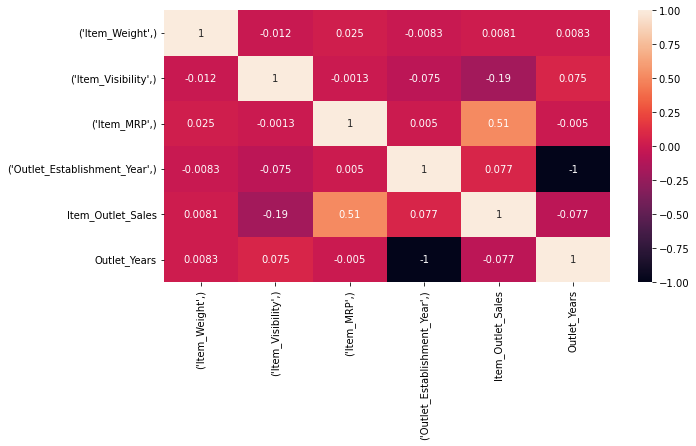

In [65]:
corr=data.corr()   #correlation
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

# Model Building

In [66]:
data.dtypes

(Item_Weight,)                  float64
(Item_Visibility,)              float64
(Item_MRP,)                     float64
(Outlet_Establishment_Year,)    float64
Item_Fat_Content                 object
Item_Type                        object
Outlet_Size                      object
Outlet_Location_Type             object
Outlet_Type                      object
Item_Outlet_Sales               float64
Outlet_Years                    float64
dtype: object

In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Outlet_Size"]=le.fit_transform(data["Outlet_Size"])
data["Outlet_Location_Type"]=le.fit_transform(data["Outlet_Location_Type"])
data["Outlet_Type"]=le.fit_transform(data["Outlet_Type"])
data["Item_Fat_Content"]=le.fit_transform(data["Item_Fat_Content"])
data["Item_Type"]=le.fit_transform(data["Item_Type"])

In [68]:
data

,"(Item_Weight,)","(Item_Visibility,)","(Item_MRP,)","(Outlet_Establishment_Year,)",Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.300,0.016047,249.8092,1999.0,0,4,0,0,1,8.225808,14.0
1,5.920,0.019278,48.2692,2009.0,1,14,0,2,2,6.096776,4.0
2,17.500,0.016760,141.6180,1999.0,0,10,0,0,1,7.648868,14.0
3,19.200,0.000000,182.0950,1998.0,1,6,0,2,0,6.597664,15.0
4,8.930,0.000000,53.8614,1987.0,0,9,0,2,1,6.903451,26.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,0,13,0,2,1,7.929984,26.0
8519,8.380,0.046982,108.1570,2002.0,1,0,0,1,1,6.310436,11.0
8520,10.600,0.035186,85.1224,2004.0,0,8,0,1,1,7.085159,9.0
8521,7.210,0.145221,103.1332,2009.0,1,13,0,2,2,7.521100,4.0


In [69]:
cat_col=["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
for i in cat_col:
    data[i]=le.fit_transform(data[i])

In [70]:
data

,"(Item_Weight,)","(Item_Visibility,)","(Item_MRP,)","(Outlet_Establishment_Year,)",Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.300,0.016047,249.8092,1999.0,0,4,0,0,1,8.225808,14.0
1,5.920,0.019278,48.2692,2009.0,1,14,0,2,2,6.096776,4.0
2,17.500,0.016760,141.6180,1999.0,0,10,0,0,1,7.648868,14.0
3,19.200,0.000000,182.0950,1998.0,1,6,0,2,0,6.597664,15.0
4,8.930,0.000000,53.8614,1987.0,0,9,0,2,1,6.903451,26.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,0,13,0,2,1,7.929984,26.0
8519,8.380,0.046982,108.1570,2002.0,1,0,0,1,1,6.310436,11.0
8520,10.600,0.035186,85.1224,2004.0,0,8,0,1,1,7.085159,9.0
8521,7.210,0.145221,103.1332,2009.0,1,13,0,2,2,7.521100,4.0


In [71]:
data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])# one hot encoding

In [72]:
data

,"(Item_Weight,)","(Item_Visibility,)","(Item_MRP,)","(Outlet_Establishment_Year,)",Item_Type,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,0.016047,249.8092,1999.0,4,8.225808,14.0,1,0,1,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009.0,14,6.096776,4.0,0,1,1,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999.0,10,7.648868,14.0,1,0,1,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998.0,6,6.597664,15.0,0,1,1,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987.0,9,6.903451,26.0,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,13,7.929984,26.0,1,0,1,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002.0,0,6.310436,11.0,0,1,1,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004.0,8,7.085159,9.0,1,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009.0,13,7.521100,4.0,0,1,1,0,0,1,0,0,1,0


In [73]:
X=data.drop("Item_Outlet_Sales",axis=1)     # splitting into train and test data
y=data["Item_Outlet_Sales"]

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=134,test_size=0.2)

In [75]:
X_train.describe()

,"(Item_Weight,)","(Item_Visibility,)","(Item_MRP,)","(Outlet_Establishment_Year,)",Item_Type,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
count,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.0,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.855756,0.065771,140.930732,1997.860810,7.221326,15.139190,0.649897,0.350103,1.0,0.279994,0.327809,0.392197,0.125257,0.655764,0.109416,0.109563
std,4.221016,0.051502,62.394613,8.369974,4.204244,8.369974,0.477037,0.477037,0.0,0.449029,0.469449,0.488276,0.331034,0.475153,0.312184,0.312367
min,4.555000,0.000000,31.490000,1985.000000,0.000000,4.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.395000,0.026818,93.620550,1987.000000,4.000000,9.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.053678,142.714100,1999.000000,6.000000,14.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.100000,0.094261,186.024000,2004.000000,10.000000,26.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,2009.000000,15.000000,28.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
X_train

,"(Item_Weight,)","(Item_Visibility,)","(Item_MRP,)","(Outlet_Establishment_Year,)",Item_Type,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
706,17.250,0.079114,99.2068,1998.0,13,15.0,0,1,1,0,0,1,1,0,0,0
912,20.600,0.082935,119.5756,1987.0,0,26.0,1,0,1,0,0,1,0,1,0,0
6175,8.355,0.188620,146.4418,2007.0,3,6.0,1,0,1,0,1,0,0,1,0,0
7766,19.350,0.076915,114.8518,2002.0,13,11.0,0,1,1,0,1,0,0,1,0,0
6213,8.695,0.120023,94.8094,2009.0,9,4.0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,8.775,0.110359,42.7428,2009.0,4,4.0,1,0,1,0,0,1,0,0,1,0
6109,8.350,0.127067,76.5354,1999.0,5,14.0,0,1,1,1,0,0,0,1,0,0
5815,15.200,0.019031,235.5248,2004.0,13,9.0,1,0,1,0,1,0,0,1,0,0
7892,20.250,0.036326,220.1482,1997.0,4,16.0,1,0,1,1,0,0,0,1,0,0


In [77]:
X_test

,"(Item_Weight,)","(Item_Visibility,)","(Item_MRP,)","(Outlet_Establishment_Year,)",Item_Type,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
4445,10.500000,0.142511,158.7578,2004.0,1,9.0,0,1,1,0,1,0,0,1,0,0
2451,14.600000,0.059405,179.6976,1997.0,9,16.0,1,0,1,1,0,0,0,1,0,0
8334,13.150000,0.020699,86.3566,1987.0,1,26.0,1,0,1,0,0,1,0,1,0,0
4109,20.500000,0.023124,154.6340,1987.0,11,26.0,1,0,1,0,0,1,0,1,0,0
6789,13.350000,0.149975,179.7660,2009.0,13,4.0,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,5.190000,0.042707,197.8110,2002.0,5,11.0,1,0,1,0,1,0,0,1,0,0
404,12.857645,0.035334,115.3518,1985.0,13,28.0,0,1,1,0,0,1,0,0,0,1
7560,8.750000,0.074565,186.8556,1987.0,6,26.0,0,1,1,0,0,1,0,1,0,0
5931,12.850000,0.099553,40.0164,2007.0,5,6.0,1,0,1,0,1,0,0,1,0,0


In [78]:
y_train

706     4.587075
912     7.888658
6175    8.036243
7766    7.443533
6213    7.264829
          ...   
4111    6.674524
6109    7.412268
5815    8.464108
7892    8.028675
1202    7.711591
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [79]:
y_test

4445    7.717533
2451    8.195044
8334    7.003280
4109    7.739799
6789    8.688332
          ...   
5051    7.988599
404     7.731069
7560    8.898839
5931    7.180799
6967    7.779838
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

# Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

C:\Users\libin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\libin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\libin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Featur

In [81]:
y_train

706     4.587075
912     7.888658
6175    8.036243
7766    7.443533
6213    7.264829
          ...   
4111    6.674524
6109    7.412268
5815    8.464108
7892    8.028675
1202    7.711591
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [82]:
y_test

4445    7.717533
2451    8.195044
8334    7.003280
4109    7.739799
6789    8.688332
          ...   
5051    7.988599
404     7.731069
7560    8.898839
5931    7.180799
6967    7.779838
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [83]:
y_pred

array([7.671875  , 7.82421875, 7.015625  , ..., 7.85546875, 6.69042969,
       7.3046875 ])

# Evaluation

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error #evaluation

In [85]:
print("mean squared error is:",(mean_squared_error(y_test,y_pred)))
print("mean absolute error is:",mean_absolute_error(y_test,y_pred))
print("R squared value is:",r2_score(y_test, y_pred))

mean squared error is: 0.28769432191488453
mean absolute error is: 0.41867692916038873
R squared value is: 0.7151462822970667


In [88]:
data.to_csv("train_v9rqX0R.csv",index=False)